In [45]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [46]:
train_arr = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
train_arr.head(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
test_arr = pd.read_csv('/kaggle/input/digit-recognizer/test.csv')
test_arr.head(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
label_arr = train_arr["label"]
train_arr1 = train_arr.drop(labels = ["label"],axis = 1) 

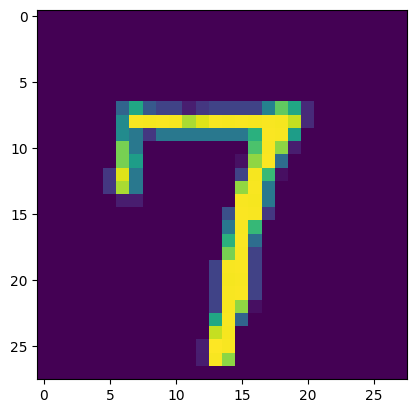

In [49]:
#Lets See the first image
import matplotlib.pyplot as plt
r1 = train_arr1.iloc[6]
r1 = np.array(r1)
img1 = r1.reshape((28,28))
plt.imshow(img1)
plt.show()

**MY FIRST CNN MODEL**

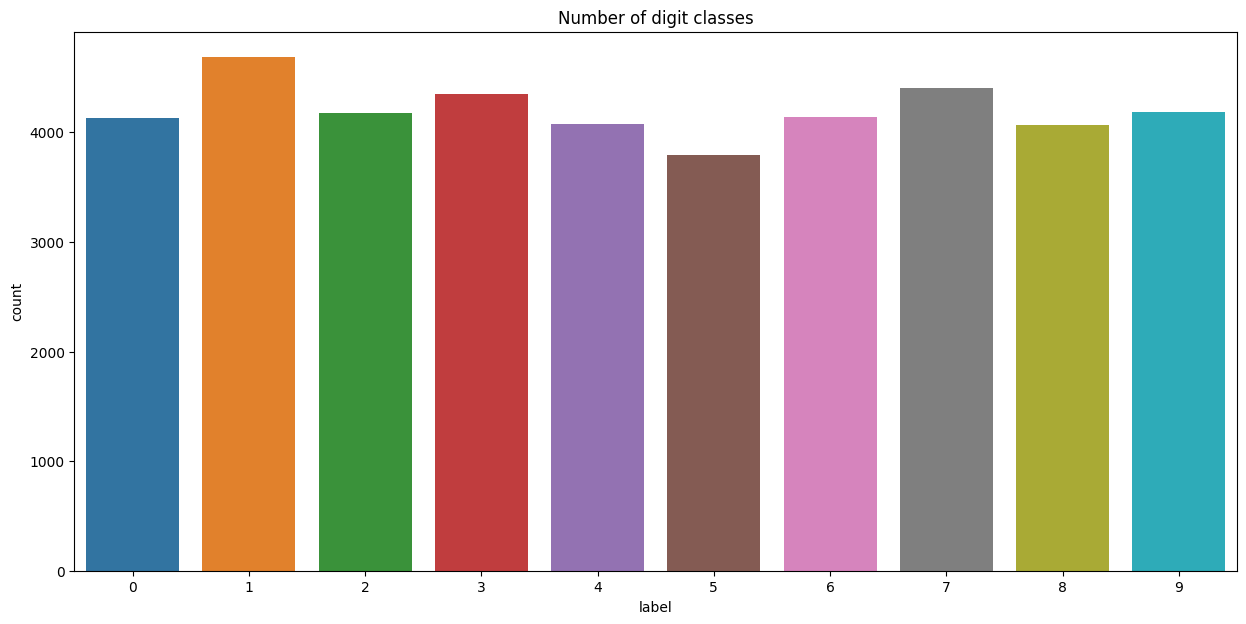

label
1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: count, dtype: int64

In [50]:
# Importing Models and class-wise distribution
import seaborn as sns
import warnings
from keras.utils import to_categorical # convert to one-hot-encoding
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
warnings.filterwarnings('ignore')
plt.figure(figsize=(15,7))
g = sns.countplot(x=label_arr)
plt.title("Number of digit classes")
plt.show()
label_arr.value_counts()

In [51]:
# Normalizing image data by division by 255(Max Pixel Value) and Reshaping
train_arr = train_arr1 / 255.0
test_arr = test_arr / 255.0
print("train shape: ",train_arr.shape)
print("test shape: ",test_arr.shape)
train_arr = train_arr.values.reshape(-1,28,28,1)
test_arr = test_arr.values.reshape(-1,28,28,1)
print("train shape: ",train_arr.shape)
print("test shape: ",test_arr.shape)
label_arr = to_categorical(label_arr,num_classes=10)

train shape:  (42000, 784)
test shape:  (28000, 784)
train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


In [52]:
# Train-test split for fitting
train_arr,train_val,y_train,y_val = train_test_split(train_arr,label_arr,test_size = 0.1, random_state=2)
print("x_train shape",train_arr.shape)
print("x_test shape",train_val.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


**USING KERAS AND DROPOUT TECHNIQUE**

In [53]:
#importing keras models
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [54]:
# Schema used:- conv => max pool => dropout => conv => max pool => dropout => fully connected (2 layer)
# Reference link used : https://www.kaggle.com/code/tongviethoang/convolutional-neural-network-cnn-tutorial
model = Sequential()
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [55]:
# Compile the model
model.compile(loss = "categorical_crossentropy", metrics=["accuracy"])

In [56]:
# Data Augmentation : Increasing the variation in the data to incorporate overfitting problem
dataaug = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

dataaug.fit(train_arr)

In [57]:
# Fitting the model
final_model = model.fit_generator(dataaug.flow(train_arr,y_train, batch_size=250),epochs = 20, validation_data = (train_val,y_val), steps_per_epoch=train_arr.shape[0] // 250)

Epoch 1/20
151/151 [==============================] - 13s 84ms/step - loss: 1.0740 - accuracy: 0.6399 - val_loss: 0.2181 - val_accuracy: 0.9464
Epoch 2/20
151/151 [==============================] - 12s 81ms/step - loss: 0.4431 - accuracy: 0.8590 - val_loss: 0.1233 - val_accuracy: 0.9624
Epoch 3/20
151/151 [==============================] - 13s 83ms/step - loss: 0.3171 - accuracy: 0.9014 - val_loss: 0.0947 - val_accuracy: 0.9698
Epoch 4/20
151/151 [==============================] - 12s 80ms/step - loss: 0.2568 - accuracy: 0.9194 - val_loss: 0.0816 - val_accuracy: 0.9750
Epoch 5/20
151/151 [==============================] - 12s 80ms/step - loss: 0.2240 - accuracy: 0.9305 - val_loss: 0.0735 - val_accuracy: 0.9760
Epoch 6/20
151/151 [==============================] - 12s 80ms/step - loss: 0.2022 - accuracy: 0.9376 - val_loss: 0.0647 - val_accuracy: 0.9807
Epoch 7/20
151/151 [==============================] - 13s 83ms/step - loss: 0.1901 - accuracy: 0.9422 - val_loss: 0.0609 - val_accuracy:

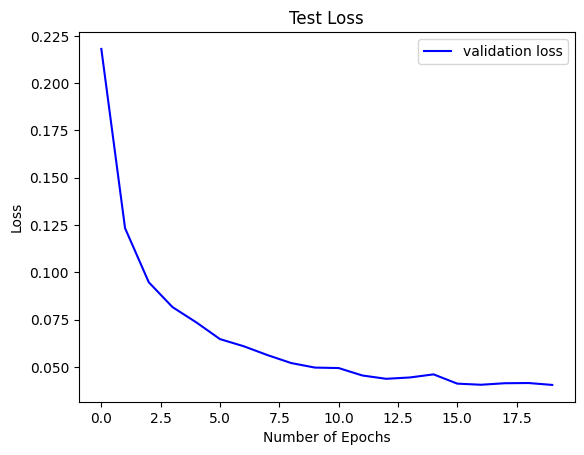

In [58]:
# Plotting the test loss over epochs for the validation set
plt.plot(final_model.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

132/132 [==============================] - 1s 5ms/step


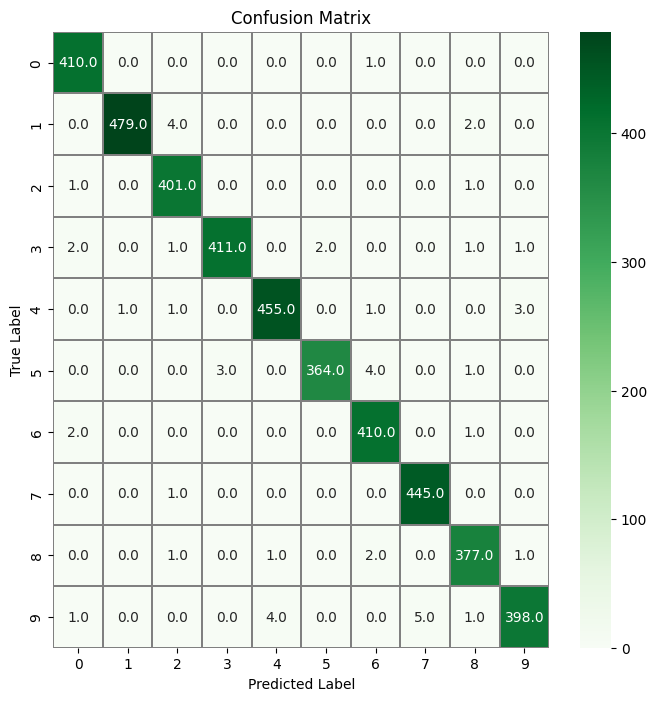

In [60]:
# Plotting the confusion matrix for evaluation
ans = model.predict(train_val)
# Convert predictions classes to one hot vectors 
labels_pred = np.argmax(ans,axis = 1) 
# Convert validation observations to one hot vectors
labels_act = np.argmax(y_val,axis = 1) 
# compute the confusion matrix
mtx = confusion_matrix(labels_act, labels_pred) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [63]:
# Now for the test data given to us
final_ans = model.predict(test_arr)
labels_pred = np.argmax(final_ans,axis = 1) 
print(labels_pred)

875/875 [==============================] - 5s 6ms/step
[2 0 9 ... 3 9 2]


In [64]:
lenx = len(test_arr)+1
df_ans = pd.DataFrame(dict(ImageId=range(1,lenx), Label=labels_pred))
df_ans.to_csv('submission.csv', index=False)